In [1]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
from tifffile import imread
from glob import glob
import math
from itertools import chain
import scipy
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from skimage import data, segmentation, feature, future
from functools import partial
import matplotlib.animation as animation

sys.path.append("/home/cstansbu/.local/lib/python3.9/site-packages/")
import skimage
from stardist.models import StarDist2D
from csbdeep.utils import normalize
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

import utils as ut
from importlib import reload 
reload(ut)
    
sys.path.append("/home/cstansbu/BayesianTracker/")
import btrack

2023-04-25 14:07:43.472791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 14:07:43.587989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2023-04-25 14:07:43.588012: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-25 14:07:43.613163: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-25 14:07:45.5934

In [4]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/wound_healing/data/inucyte_pf_reporter/Incucyte-stitched-s7_s7.ome.tiff"

im = imread(fpath)
print(f"{im.shape=}")

TiffFrame 435: missing required tags
OME series: expected 435 frames, got 436


im.shape=(3, 145, 2175, 2999, 3)


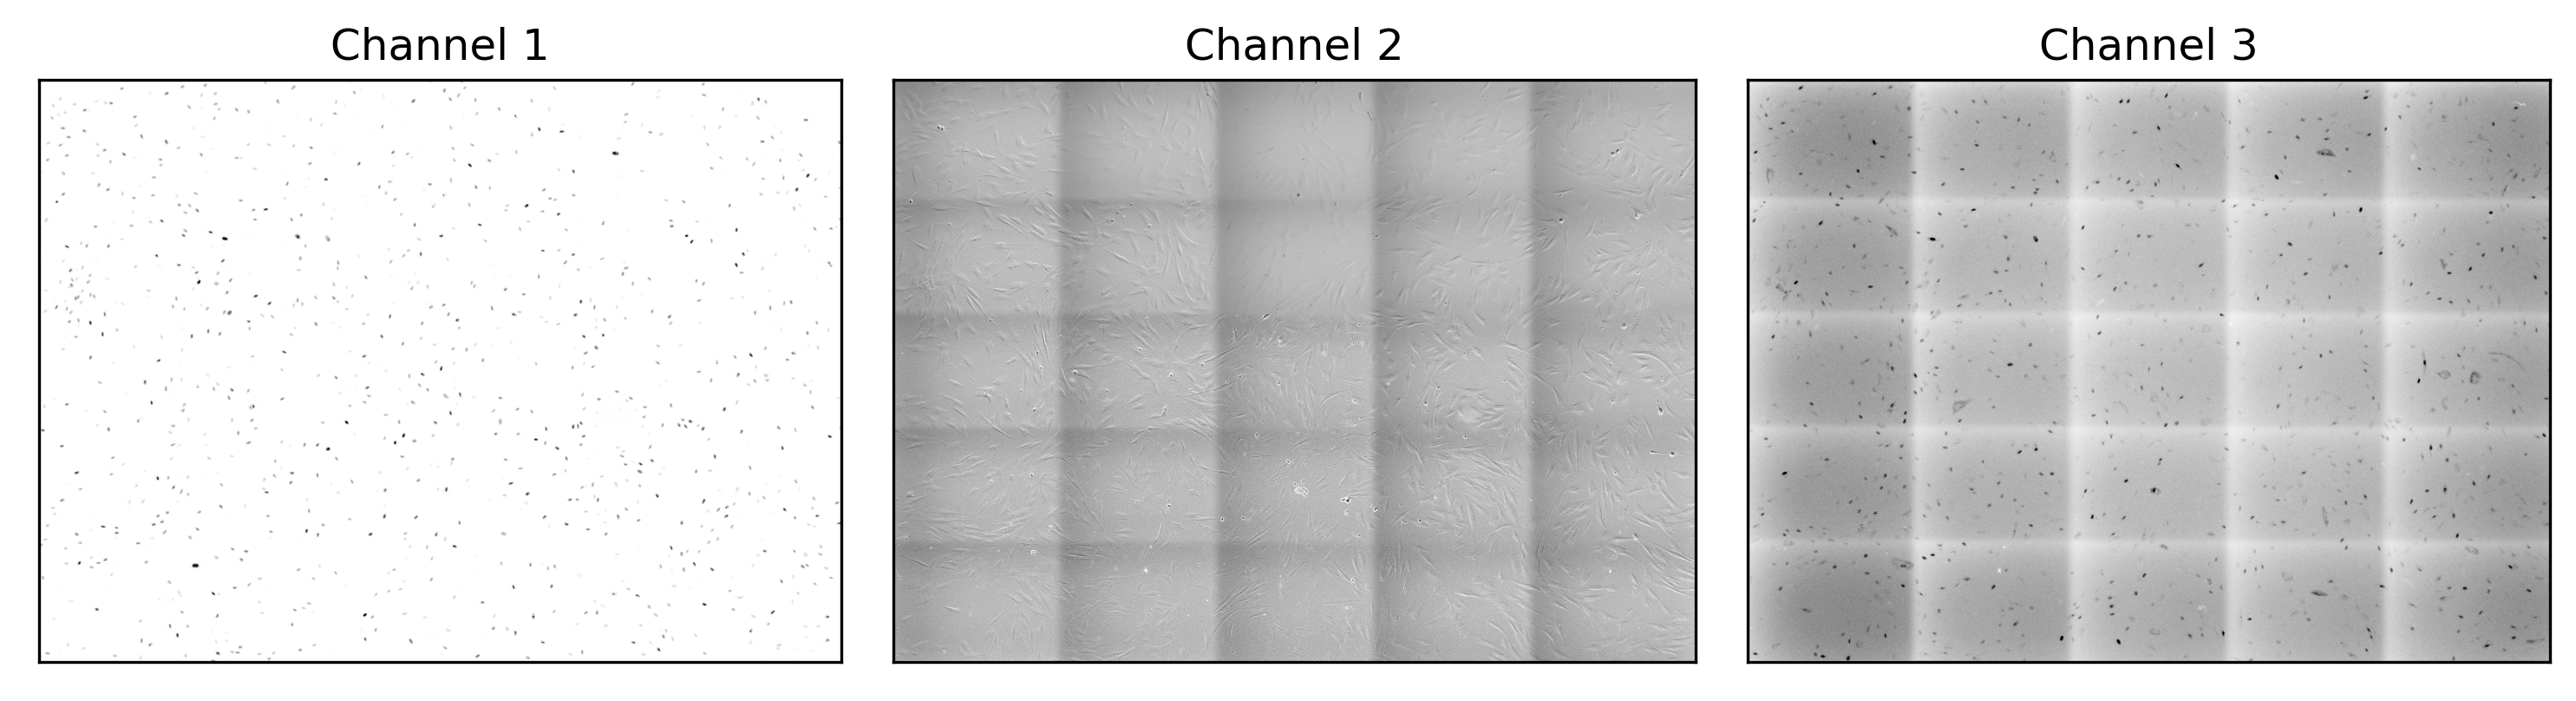

In [37]:
t = 5

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 10, 5

fig, axs = plt.subplots(1, 3)


axs[0].imshow(im[0, t, :, :, 0], cmap='binary')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Channel 1")

axs[1].imshow(im[1, t, :, :, 1], cmap='binary')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Channel 2")

axs[2].imshow(im[2, t, :, :, 2], cmap='binary')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title("Channel 3")

plt.tight_layout()


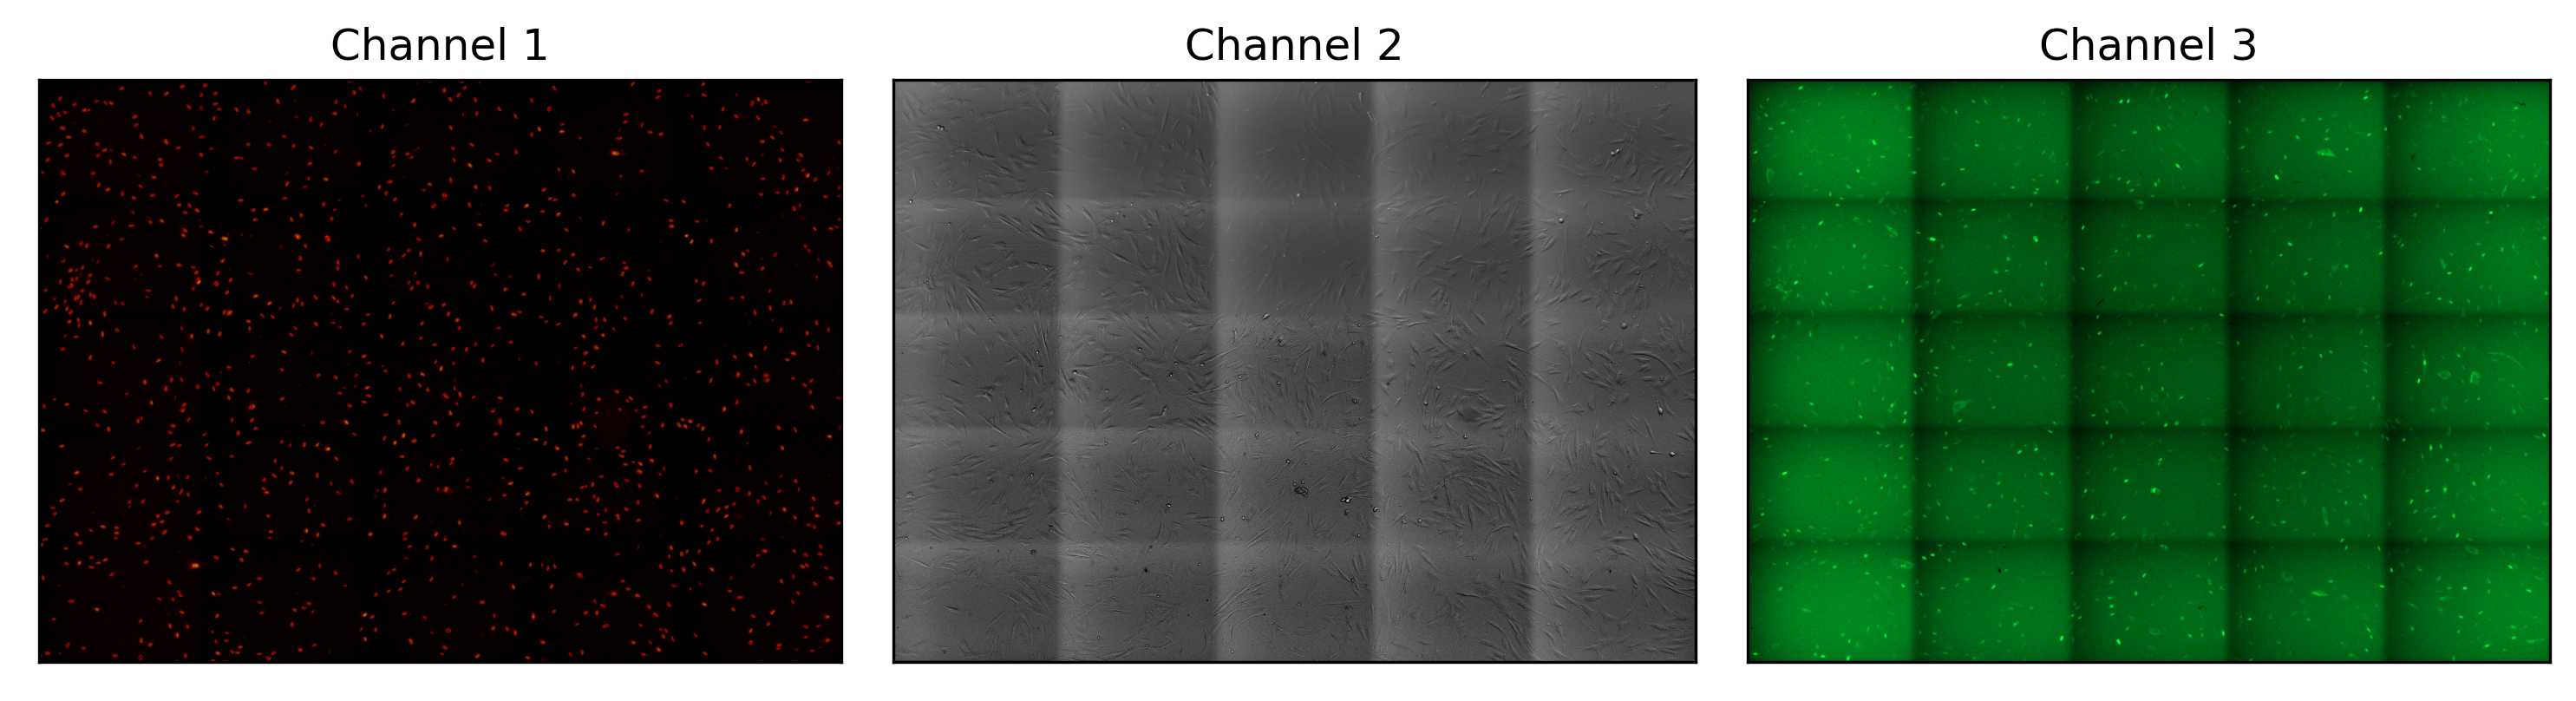

In [52]:
t = 5

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 10, 5

fig, axs = plt.subplots(1, 3)

axs[0].imshow(skimage.exposure.adjust_log(im[0, t, :, :, :], 10))
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Channel 1")

axs[1].imshow(im[1, t, :, :, :])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Channel 2")

axs[2].imshow(skimage.exposure.adjust_log(im[2, t, :, :, :], 1))
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title("Channel 3")

plt.tight_layout()


# img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)